<a href="https://colab.research.google.com/github/RAGUL1531/Credit-Card-Fraud-Detection/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE MODULES

In [ ]:
#Importing the Dependency files
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

LOADING THE DATASET

In [ ]:
#Load the csv file  to pandas data frame data
data=pd.read_csv("/content/creditcard.csv")

In [ ]:
#first five rows of data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
#last five rows of data
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
132779,80109,1.310383,0.148796,-0.106156,0.245652,0.376795,0.276660,-0.048826,0.027499,0.151769,...,-0.321307,-0.897167,-0.008168,-1.336089,0.327048,0.211107,-0.015559,0.001677,4.49,0.0
132780,80109,1.187695,0.161777,-0.102921,0.367072,0.000082,-0.725995,0.370336,-0.169480,-0.441230,...,-0.329042,-1.104087,0.058738,0.007578,0.288024,0.136426,-0.075150,0.003084,45.95,0.0
132781,80109,1.210400,-0.061808,0.934410,1.149472,-0.586856,0.269742,-0.582677,0.148328,0.963741,...,-0.118127,-0.134792,-0.107835,-0.459923,0.522964,-0.356392,0.070720,0.029614,9.99,0.0
132782,80110,-0.357977,-0.288527,1.506609,-2.484692,-1.031518,-0.910416,-0.259715,0.024064,-2.413570,...,-0.077703,0.151033,-0.004620,0.481458,-0.370021,-0.439370,0.380669,0.203272,15.00,0.0
132783,80110,-1.824050,0.750460,1.120322,1.158644,-0.184192,-0.196253,-0.008336,0.202622,-0.182532,...,-0.156936,-0.392619,-0.116801,-0.058439,0.238796,NaN,NaN,NaN,NaN,NaN


In [ ]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132784 entries, 0 to 132783
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    132784 non-null  int64  
 1   V1      132784 non-null  float64
 2   V2      132784 non-null  float64
 3   V3      132784 non-null  float64
 4   V4      132784 non-null  float64
 5   V5      132784 non-null  float64
 6   V6      132784 non-null  float64
 7   V7      132784 non-null  float64
 8   V8      132784 non-null  float64
 9   V9      132784 non-null  float64
 10  V10     132784 non-null  float64
 11  V11     132784 non-null  float64
 12  V12     132784 non-null  float64
 13  V13     132784 non-null  float64
 14  V14     132784 non-null  float64
 15  V15     132784 non-null  float64
 16  V16     132784 non-null  float64
 17  V17     132784 non-null  float64
 18  V18     132784 non-null  float64
 19  V19     132784 non-null  float64
 20  V20     132784 non-null  float64
 21  V21     13

DATA PREPROCESSING

In [ ]:
#checking the no of missing values in  each column
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


HANDLE THE MISSSING VALUES BY USING THE FORWARD FILL METHOD

In [ ]:
data.ffill()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132779,80109,1.310383,0.148796,-0.106156,0.245652,0.376795,0.276660,-0.048826,0.027499,0.151769,...,-0.321307,-0.897167,-0.008168,-1.336089,0.327048,0.211107,-0.015559,0.001677,4.49,0.0
132780,80109,1.187695,0.161777,-0.102921,0.367072,0.000082,-0.725995,0.370336,-0.169480,-0.441230,...,-0.329042,-1.104087,0.058738,0.007578,0.288024,0.136426,-0.075150,0.003084,45.95,0.0
132781,80109,1.210400,-0.061808,0.934410,1.149472,-0.586856,0.269742,-0.582677,0.148328,0.963741,...,-0.118127,-0.134792,-0.107835,-0.459923,0.522964,-0.356392,0.070720,0.029614,9.99,0.0
132782,80110,-0.357977,-0.288527,1.506609,-2.484692,-1.031518,-0.910416,-0.259715,0.024064,-2.413570,...,-0.077703,0.151033,-0.004620,0.481458,-0.370021,-0.439370,0.380669,0.203272,15.00,0.0


In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Exploratory Data Analysis

In [ ]:
#distribution of legal and fraud transaction
data['Class'].value_counts()

,count
Class,
0.0,132522
1.0,262


<Axes: >

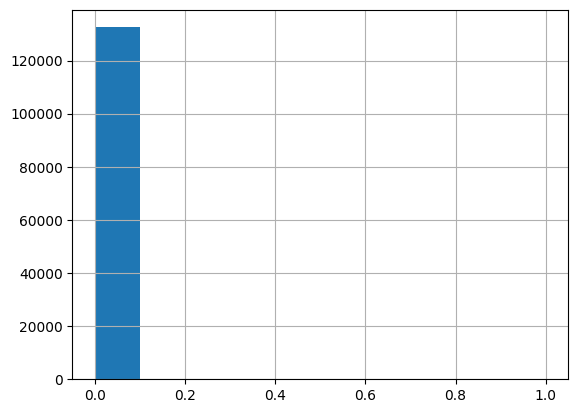

In [ ]:
data['Class'].hist()

This dataset is highly unblanced
0 -> Represents legal transaction
1 -> Represents illegal transaction

In [ ]:
#seperate the two trasaction
legit=data[data.Class==0]
illegal=data[data.Class==1]
print(legit.shape)
print(illegal.shape)

(132522, 31)
(262, 31)


In [ ]:
#statistical measures of data
legit.Amount.describe()


,Amount
count,132522.000000
mean,92.152165
std,250.206105
min,0.000000
25%,6.150000
50%,24.350000
75%,82.000000
max,19656.530000


In [ ]:
illegal.Amount.describe()

,Amount
count,262.000000
mean,116.235115
std,245.933637
min,0.000000
25%,1.000000
50%,10.685000
75%,99.990000
max,1809.680000


In [ ]:
#compare the values between two transaction
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,50251.570464,-0.234184,-0.005191,0.692798,0.133160,-0.278165,0.082263,-0.106356,0.059550,-0.080087,...,0.041304,-0.040331,-0.115565,-0.034117,0.012655,0.130889,0.022868,-0.000017,0.002268,92.152165
1.0,42119.370229,-5.644679,3.962258,-7.190628,4.521182,-4.002069,-1.489680,-5.965750,1.512608,-2.610845,...,0.240131,1.263063,-0.315132,-0.117179,-0.104567,0.200913,0.056370,0.491164,0.081891,116.235115


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 262

In [ ]:
legit_sample=legit.sample(n=262)

concatenate the two data frames

In [ ]:
new_data=pd.concat([legit_sample,illegal],axis=0)
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
109885,71584,-0.909374,0.992077,1.348552,-0.467462,0.418088,-1.269538,0.718922,-0.106261,-0.240709,...,-0.231657,-0.666610,-0.069101,0.325109,-0.303012,-0.106669,0.208919,0.183180,2.58,0.0
120047,75691,-1.252044,0.418576,2.371630,-1.920095,-1.519677,-0.553727,-0.778864,0.569965,-0.794304,...,0.490774,1.204115,-0.332849,0.421799,0.431337,-0.158832,0.052810,0.064988,15.99,0.0
33706,37349,0.931771,-0.137067,0.410378,1.402014,-0.295256,0.049571,0.081760,0.101398,0.027615,...,0.016853,0.035512,-0.128214,0.233097,0.567516,-0.351517,0.018361,0.023318,99.20,0.0
67693,52662,0.414912,0.935654,1.020619,2.788377,-0.087941,0.609241,-0.643861,-0.449576,-0.938564,...,0.852682,-0.067299,-0.174001,-0.118482,0.651457,0.277169,0.109524,0.118785,12.00,0.0
93448,64424,1.271408,-0.885300,1.137346,-0.655993,-1.414321,0.280403,-1.357605,0.315574,-0.297544,...,0.381988,1.157584,-0.081681,0.058873,0.340169,-0.032431,0.060027,0.011017,9.80,0.0


In [ ]:
new_data['Class'].value_counts()

,count
Class,
0.0,262
1.0,262


<Axes: >

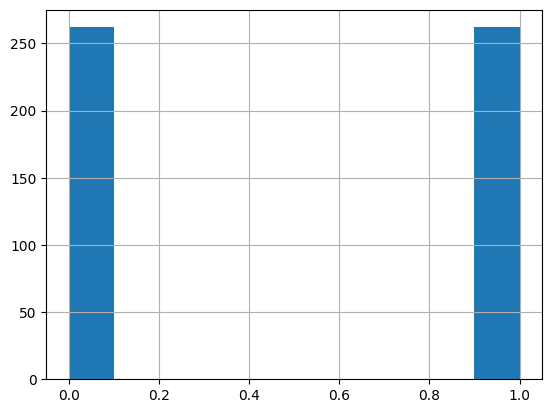

In [ ]:
new_data['Class'].hist()

Now the new dataset is equally balanced

In [ ]:
#compare the values between two transaction of new dataset
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,48806.519084,-0.312643,0.117007,0.632435,0.200297,-0.210773,-0.04117,-0.254404,0.122570,-0.031175,...,-0.012283,-0.035106,-0.090393,-0.098402,0.006709,0.150431,0.021205,-0.017429,-0.016351,66.500420
1.0,42119.370229,-5.644679,3.962258,-7.190628,4.521182,-4.002069,-1.48968,-5.965750,1.512608,-2.610845,...,0.240131,1.263063,-0.315132,-0.117179,-0.104567,0.200913,0.056370,0.491164,0.081891,116.235115


MODEL TRAINING

#split the  new-data into features and targets
X is feature variable and Y is class variable

In [ ]:
X=new_data.drop(columns='Class',axis=1)
Y=new_data['Class']


In [ ]:
print(X)

         Time        V1        V2        V3        V4        V5        V6  \
109885  71584 -0.909374  0.992077  1.348552 -0.467462  0.418088 -1.269538   
120047  75691 -1.252044  0.418576  2.371630 -1.920095 -1.519677 -0.553727   
33706   37349  0.931771 -0.137067  0.410378  1.402014 -0.295256  0.049571   
67693   52662  0.414912  0.935654  1.020619  2.788377 -0.087941  0.609241   
93448   64424  1.271408 -0.885300  1.137346 -0.655993 -1.414321  0.280403   
...       ...       ...       ...       ...       ...       ...       ...   
124115  77182 -1.410852  2.268271 -2.297554  1.871331  0.248957 -1.208799   
124176  77202 -0.356326  1.435305 -0.813564  1.993117  2.055878 -0.543579   
125342  77627 -7.139060  2.773082 -6.757845  4.446456 -5.464428 -1.713401   
128479  78725 -4.312479  1.886476 -2.338634 -0.475243 -1.185444 -2.112079   
131272  79540 -0.114361  1.036129  1.984405  3.128243 -0.740344  1.548619   

              V7        V8        V9  ...       V20       V21       V22  \


In [ ]:
print(Y)

109885    0.0
120047    0.0
33706     0.0
67693     0.0
93448     0.0
         ... 
124115    1.0
124176    1.0
125342    1.0
128479    1.0
131272    1.0
Name: Class, Length: 524, dtype: float64


Split the data into Training and Testing Data

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape,Xtrain.shape,Xtest.shape)

(524, 30) (419, 30) (105, 30)


Training the Model By using Logistic Regression

In [ ]:
model=LogisticRegression(max_iter=10000)

Training the Logistics Regression model by training data set

In [ ]:
model.fit(Xtrain,Ytrain)

LogisticRegression(max_iter=10000)

MODEL EVALUATION

Accuracy score on training data

In [ ]:
Xtrain_predict=model.predict(Xtrain)
train_accuracy=accuracy_score(Xtrain_predict,Ytrain)
report_test=classification_report(Xtrain_predict,Ytrain)
print(report_test)

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97       215
         1.0       0.95      0.98      0.97       204

    accuracy                           0.97       419
   macro avg       0.97      0.97      0.97       419
weighted avg       0.97      0.97      0.97       419



In [ ]:
print("The  training data accuracy is",train_accuracy)

The  training data accuracy is 0.9665871121718377


Accuracy score On test data

In [ ]:
Xtest_predict=model.predict(Xtest)
test_accuracy=accuracy_score(Xtest_predict,Ytest)
report_test = classification_report(Xtest_predict, Ytest)
print(report_test)

              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90        58
         1.0       0.85      0.94      0.89        47

    accuracy                           0.90       105
   macro avg       0.89      0.90      0.89       105
weighted avg       0.90      0.90      0.90       105



In [ ]:
print("The  test data accuracy is",test_accuracy)

The  test data accuracy is 0.8952380952380953
